# Project 

**Name**: Nick Wunderle

For this project I have 6. The datasets come from the Bureau of Transportation Statistics. These datasets are reported airline delay information for Jan-Jun, 2023 with each month being an individual dataset.

The BTS datasets have upwards of 40 attrtibutes which include information like date and time, airline, aircraft, origin city, destination city, delay times, taxi times, flight times. A lot of the attributes are categorical and include both ordinal and nominal values. Some are continous values that include both interval and ratio values. 

The attributes being used as class labels for predictions will be departure delay (either yes or no) and departure delay time (length of delay). The delay time will be binned for categorical label predictions. 

Each month is loaded into its own table and has 5000 instances. When combined there are 30000 total instances.

In [1]:
from data_table import *
from data_util import *
from data_learn import *
from data_eval import *
from data_tailor import *

In [2]:
jan_table = DataTable(['year','month','date','day','flight date', 'unique airline code', 'carrier code',
                      'airline code', 'aircraft tail', 'flight number', 'origin airport id', 'airport seq', 'market id',
                      'origin', 'origin city', 'origin state abv', 'origin state', 'dest airport id', 'dest airport seq',
                      'dest market id', 'dest', 'dest city', 'dest state abv', 'dest state', 'scheduled dep',
                      'actual dep', 'dep delay', 'dep delay new', 'delay','dep block', 'taxi out', 'wheels off',
                      'wheels on', 'taxi in', 'scheduled arr', 'actual arr', 'arr delay', 'arr delay new', 'binary arr delay',
                      'arr block', 'cancelled', 'scheduled block time', 'actual block time', 'flight time',
                       'flights', 'distance'])
jan_table.load('january_data1.csv')

In [3]:
print(jan_table.row_count())

5001


In [4]:
feb_table = DataTable(['year','month','date','day','flight date', 'unique airline code', 'carrier code',
             'aircraft tail', 'flight number', 'origin airport id', 'airport seq', 'market id',
             'origin', 'origin city', 'origin state abv', 'origin state', 'dest airport id', 'dest airport seq',
             'dest market id', 'dest', 'dest city', 'dest state abv', 'dest state', 'scheduled dep',
             'actual dep', 'dep delay', 'dep delay new', 'delay','dep block', 'taxi out', 'wheels off',
             'wheels on', 'taxi in', 'scheduled arr', 'actual arr', 'arr delay', 'arr delay new', 'binary arr delay',
             'cancelled', 'scheduled block time', 'actual block time', 'flight time',
             'flights', 'distance'])
feb_table.load('february_data1.csv')

In [5]:
print(feb_table.row_count())

5001


In [6]:
march_table = DataTable(['year','month','date','day','flight date', 'unique airline code',
             'aircraft tail', 'origin airport id', 'airport seq', 'market id',
             'origin', 'origin city', 'origin state abv', 'origin state', 'dest airport id', 'dest airport seq',
             'dest market id', 'dest', 'dest city', 'dest state abv', 'dest state', 'scheduled dep',
             'actual dep', 'dep delay', 'dep delay new', 'delay', 'taxi out', 'wheels off',
             'wheels on', 'taxi in', 'scheduled arr', 'actual arr', 'arr delay', 'arr delay new', 'binary arr delay',
             'cancelled'])
march_table.load('march_data1.csv')

In [7]:
print(march_table.row_count())

5001


In [8]:
april_table = DataTable(['year','month','date','day','flight date', 'unique airline code',
             'aircraft tail', 'origin airport id', 'airport seq', 'market id',
             'origin', 'origin city', 'origin state abv', 'origin state', 'dest airport id', 'dest airport seq',
             'dest market id', 'dest', 'dest city', 'dest state abv', 'dest state', 'scheduled dep',
             'actual dep', 'dep delay', 'dep delay new', 'delay', 'taxi out', 'wheels off',
             'wheels on', 'taxi in', 'scheduled arr', 'actual arr', 'arr delay', 'arr delay new', 'binary arr delay',
             'cancelled'])
april_table.load('april_data1.csv')

In [9]:
print(april_table.row_count())

5001


In [10]:
may_table = DataTable(['year','month','date','day','flight date', 'unique airline code',
             'aircraft tail', 'origin airport id', 'airport seq', 'market id',
             'origin', 'origin city', 'origin state abv', 'origin state', 'dest airport id', 'dest airport seq',
             'dest market id', 'dest', 'dest city', 'dest state abv', 'dest state', 'scheduled dep',
             'actual dep', 'dep delay', 'dep delay new', 'delay', 'taxi out', 'wheels off',
             'wheels on', 'taxi in', 'scheduled arr', 'actual arr', 'arr delay', 'arr delay new', 'binary arr delay',
             'cancelled'])
may_table.load('may_data1.csv')

In [11]:
print(may_table.row_count())

5001


In [12]:
june_table = DataTable(['year','month','date','day','flight date', 'unique airline code',
             'aircraft tail', 'origin airport id', 'airport seq', 'market id',
             'origin', 'origin city', 'origin state abv', 'origin state', 'dest airport id', 'dest airport seq',
             'dest market id', 'dest', 'dest city', 'dest state abv', 'dest state', 'scheduled dep',
             'actual dep', 'dep delay', 'dep delay new', 'delay', 'taxi out', 'wheels off',
             'wheels on', 'taxi in', 'scheduled arr', 'actual arr', 'arr delay', 'arr delay new', 'binary arr delay',
             'cancelled'])
june_table.load('june_data1.csv')

In [13]:
print(june_table.row_count())

5001


# Cleaning and Training

For cleaning the data, I will be removing a lot of attributes. Many of the attributes are redundant and do not need to be included. Missing data will likely just lead to a removal of the instance as I have such a large number of instances. My class labels are already binned into 2 categories and as such I do not need to discretize.

I am planning to train my classifiers on day of week, airline code, origin, dest, scheduled dep. The reason for each of these is that different days of the week are busier than others in terms of volume of flights. Some airlines are more prone to delays than others. We also use origin and dest as some cities experience adverse weather more frequently which impacts delays. We also train on scheduled departure time as airlines are more incentivised to be on time earlier in the day which can help to indicate delays.

In this first step, I am cleaning up some columns that are not in each month's data table and dropping them. They are attributes that were meant to be dropped anyway. Additionally, I am deleting the first instance of each table as it is the attributes themselves not actual data.

In [14]:
x=jan_table.columns()
y=feb_table.columns()
drop = list(set(x).difference(set(y)))
jan_table.drop(drop)
del jan_table[0]
del feb_table[0]
del march_table[0]
del april_table[0]
del may_table[0]
del june_table[0]

In [15]:
x = feb_table.columns()
y = march_table.columns()
drop = list(set(x).difference(set(y)))
feb_table.drop(drop)
jan_table.drop(drop)

In [16]:
combine_table = jan_table.copy()

Here I have taken the somewhat cleaned January table and am now adding the instances from each month to it.

In [17]:
for row in feb_table:
    combine_table.append(row.values())
for row in march_table:
    combine_table.append(row.values())
for row in april_table:
    combine_table.append(row.values())
for row in may_table:
    combine_table.append(row.values())
for row in june_table:
    combine_table.append(row.values())

Now I am dropping the attributes that I will not be using.

In [18]:
combine_table.drop(['year','date', 'aircraft tail', 'origin airport id', 'airport seq', 'market id',
             'origin city', 'origin state abv', 'origin state', 'dest airport id', 'dest airport seq',
             'dest market id', 'dest city', 'dest state abv', 'dest state',
             'dep delay', 'taxi out', 'wheels off',
             'wheels on', 'taxi in', 'scheduled arr', 'actual arr', 'arr delay', 'arr delay new', 'binary arr delay',
             'cancelled'])

Now I check for missing or irregular values in my label column.

In [19]:
print(combine_table.row_count())
groups, counts = frequencies(combine_table, 'delay')
print(groups)
print(counts)

30000
[0, 1, '']
[23074, 6414, 512]


I see that I only have missing values and since there are only 512 of them, I just remove them altogether.

In [20]:
new_table = DataTable(combine_table.columns())
new_table = remove_missing(combine_table, ['delay'])
groups, counts = frequencies(new_table, 'delay')
print(groups)
print(counts)

[0, 1]
[23074, 6414]


Now that my table is cleaned, I create training and test sets using stratified holdout.

In [21]:
train,test=stratified_holdout(new_table, 'delay', .5*new_table.row_count())

## Visualization

Here I am including some visualizations to help see how often delays occur, or the distribution. The dot chart also helps us to see when flights are delayed, how often the delays are short or long. 

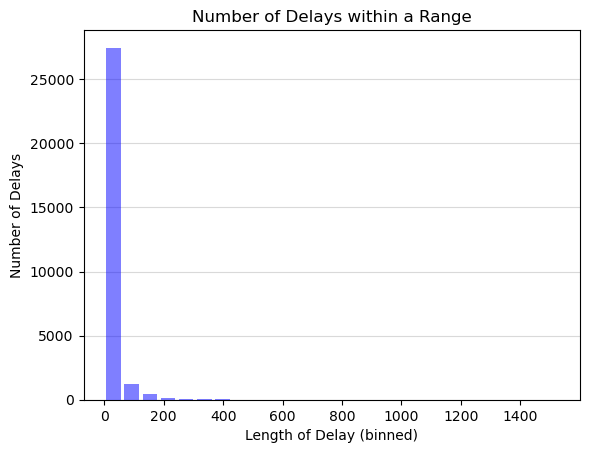

In [22]:
histogram(new_table, 'dep delay new', 25, 'Length of Delay (binned)', 'Number of Delays', 'Number of Delays within a Range')

This histogram shows us approximately how many delays are of each length in minutes. It can be misleading as delays of length 0 (no delay) get binned with delays that are very short.

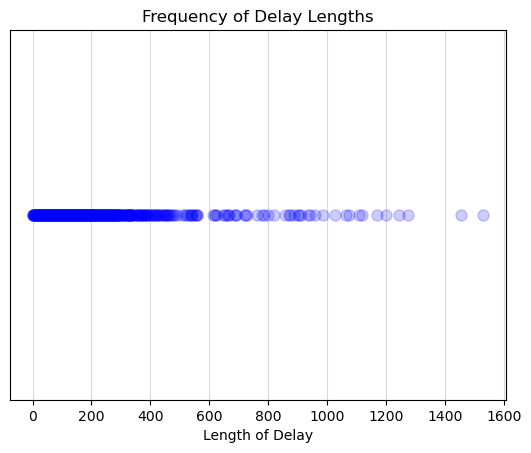

In [23]:
labels1, counts1 = frequencies(new_table, 'dep delay new')
dot_chart(labels1, 'Length of Delay', 'Frequency of Delay Lengths')

This dot chart helps us to better see the frequency of length of delays in minutes. There are clearly a lot of flights not delayed at all. Most of the delays that do occur also happen to be shorter in length for the most part.

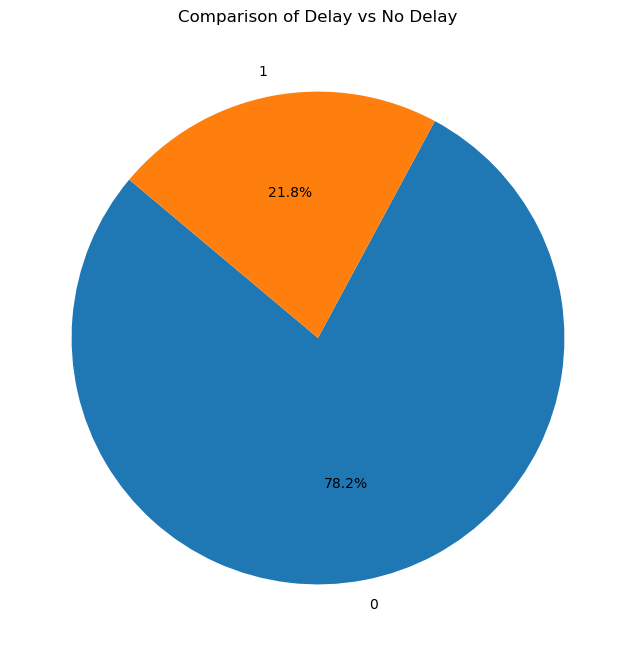

In [24]:
labels, counts = frequencies(new_table, 'delay')
pie_chart(counts, labels, 'Comparison of Delay vs No Delay')

This pie chart shows the distribution of delay status. For our evaluation purposes, 0 is no delay and 1 is a delay.

# Inital Evaluation

In this step, I will be implementing kNN and Naive Bayes using the train and test sets created above. I am using the single stratified holdout method as my classifiers take a long time to run and the kNN stratified and Naive Bayes stratified evaluators are too slow. 

In [25]:
knn_matrix=knn_eval(train,test,majority_vote,3,'delay',['scheduled dep'], ['day','origin','dest','unique airline code'])

In [26]:
avg_acc = (accuracy(knn_matrix,0)+accuracy(knn_matrix,1))/2
avg_prec = (precision(knn_matrix,0)+precision(knn_matrix,1))/2
avg_recall = (recall(knn_matrix,0)+recall(knn_matrix,1))/2
macrof = ((2*avg_prec*avg_recall)/(avg_prec+avg_recall))
print(knn_matrix)
print('Predicted delay accuracy: %s' %avg_acc)
print('Predicted delay precision: %s' %avg_prec)
print('Predicted delay Recall: %s' %avg_recall)
print('Macro F measure: %s' %macrof)

------  -----  --
actual      0   1
0       11438  99
1        3171  36
------  -----  --
Predicted delay accuracy: 0.7782148670645687
Predicted delay precision: 0.5248043443539371
Predicted delay Recall: 0.5013221787014132
Macro F measure: 0.5127945753124067


In [ ]:
naive_matrix = naive_bayes_eval(train, test, 'delay', ['scheduled dep'], ['day','origin','dest','unique airline code'])

In [ ]:
avg_acc = (accuracy(naive_matrix,0)+accuracy(naive_matrix,1))/2
avg_prec = (precision(naive_matrix,0)+precision(naive_matrix,1))/2
avg_recall = (recall(naive_matrix,0)+recall(naive_matrix,1))/2
macrof = ((2*avg_prec*avg_recall)/(avg_prec+avg_recall))
print(naive_matrix)
print('Predicted delay accuracy: %s' %avg_acc)
print('Predicted delay precision: %s' %avg_prec)
print('Predicted delay Recall: %s' %avg_recall)
print('Macro F measure: %s' %macrof)

Of these two classifiers, their performance is about the same. 

# Tailored Approach

In [ ]:
custom_matrix = imbalanced_knn_eval(train, test, 'delay', ['scheduled dep'], ['day', 'origin','dest','unique airline code'])

# Conclusion

With my project, I had some issues with classification due to efficiency issues. My kNN and Naive Bayes classifiers were very slow with my datasets and thus made it rather difficult to test different parameters as some runs would take upward of 30 minutes. Additionally, I had trouble in the last two weeks of the semester implementing a decision tree, mostly when it came to pruning and cleaning the trees. As such, I do not have a working decision tree classifier. 

On top of this, I was planning to also classify length of departure in addition to delay status. I did not have enough time to do this and it would be my next step. To do this I would discretize the delay length values and run my classifiers to predict a delay or not. For the instances where a delay is predicted, I would then predict delay length in binned intervals, likely binned by 15 minute intervals up to 180 minutes.